<a href="https://colab.research.google.com/github/chaitra0312/ML/blob/main/Stock_Price__prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance --quiet

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
plt.style.use('seaborn-v0_8-darkgrid')

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
tickers = ['AAPL','GOOGL','MSFT','AMZN']
data = yf.download(tickers, start='2015-01-01',end ='2024-12-31',group_by='tickrers')
data['AAPL'].head()

/tmp/ipython-input-5-140670032.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2015-01-01',end ='2024-12-31',group_by='tickrers')
[*********************100%***********************]  4 of 4 completed


Price,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,24.746222,24.757330,23.848702,24.288576,212818400
2015-01-05,24.057541,24.137518,23.417725,23.604338,257142000
2015-01-06,23.668756,23.866477,23.244433,23.606552,263188400
2015-01-07,23.815381,24.037539,23.704302,23.937569,160423600
2015-01-08,24.266371,24.915073,24.148625,24.857311,237458000


In [ ]:

company_data = {}
for ticker in tickers:
    df = data[ticker].copy()
    df.dropna(inplace=True)
    df['Next_Close'] = df['Close'].shift(-1)
    df['Target_Label'] = np.where(df['Next_Close'] > df['Close'], 'Up', 'Down')
    df = df[:-1]

    company_data[ticker] = df

company_data['AAPL'].head()


Price,Open,High,Low,Close,Volume,Next_Close,Target_Label
Date,,,,,,,
2015-01-02,24.746222,24.757330,23.848702,24.288576,212818400,23.604338,Down
2015-01-05,24.057541,24.137518,23.417725,23.604338,257142000,23.606552,Up
2015-01-06,23.668756,23.866477,23.244433,23.606552,263188400,23.937569,Up
2015-01-07,23.815381,24.037539,23.704302,23.937569,160423600,24.857311,Up
2015-01-08,24.266371,24.915073,24.148625,24.857311,237458000,24.883961,Up


In [ ]:
df = company_data['AAPL']
features = df[['Open','High','Low','Volume']]
regression_target = df['Next_Close']
classification_target= df['Target_Label']
X_train,X_test,y_reg_train,y_reg_test = train_test_split(features,regression_target,test_size = 0.2,random_state=42)
_,_,y_clf_train,y_clf_test = train_test_split(features,classification_target,test_size=0.2,random_state=42)
print("Training samples:",X_train.shape[0])
print("Testing samples:",X_test.shape[0])

Training samples: 2011
Testing samples: 503


In [ ]:
import math
rag_model = LinearRegression()
rag_model.fit(X_train,y_reg_train)
y_pred_reg  = rag_model.predict(X_test)
mae = mean_absolute_error(y_reg_test,y_pred_reg)
mse = mean_squared_error(y_reg_test,y_pred_reg)
rmse = math.sqrt(mse)
r2 = r2_score(y_reg_test,y_pred_reg)
print("📈 Regression Results:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 4))

📈 Regression Results:
Mean Absolute Error (MAE): 1.34
Root Mean Squared Error (RMSE): 2.19
R² Score: 0.9989


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
clf_model = LogisticRegression(max_iter=1000,class_weight ='balanced')
clf_model.fit(X_train,y_clf_train)
y_pred_clf = clf_model.predict(X_test)
accuracy = accuracy_score(y_clf_test,y_pred_clf)
conf_matrix =confusion_matrix(y_clf_test,y_pred_clf)
report = classification_report(y_clf_test,y_pred_clf)
print("🔁 Classification Results:")
print("Accuracy:", round(accuracy * 100, 2), "%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


🔁 Classification Results:
Accuracy: 51.29 %

Confusion Matrix:
 [[258   0]
 [245   0]]

Classification Report:
               precision    recall  f1-score   support

        Down       0.51      1.00      0.68       258
          Up       0.00      0.00      0.00       245

    accuracy                           0.51       503
   macro avg       0.26      0.50      0.34       503
weighted avg       0.26      0.51      0.35       503



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
!pip install xgboost --quiet

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_clf_train_enc = le.fit_transform(y_clf_train)
y_clf_test_enc = le.transform(y_clf_test)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
xgb_model= XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_clf_train_enc)
y_pred_xgb = xgb_model.predict(X_test)
acc = accuracy_score(y_clf_test_enc,y_pred_xgb)
conf_matrix= confusion_matrix(y_clf_test_enc,y_pred_xgb)
report = classification_report(y_clf_test_enc,y_pred_xgb)
print("⚡ XGBoost Classification Results:")
print("Accuracy:", round(acc * 100, 2), "%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:51:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


⚡ XGBoost Classification Results:
Accuracy: 48.91 %

Confusion Matrix:
 [[109 149]
 [108 137]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.42      0.46       258
           1       0.48      0.56      0.52       245

    accuracy                           0.49       503
   macro avg       0.49      0.49      0.49       503
weighted avg       0.49      0.49      0.49       503



In [ ]:
from sklearn.preprocessing import MinMaxScaler
df =  company_data['AAPL'].copy()
close_prices = df[['Close']]
scaler = MinMaxScaler()
scaled_data= scaler.fit_transform(close_prices)
X_lstm = []
y_lstm = []
sequence_length = 10
for i in range(sequence_length, len(scaled_data)):
  X_lstm.append(scaled_data[i-sequence_length:i,0])
  y_lstm.append(scaled_data[i,0])
X_lstm, y_lstm = np.array(X_lstm),np.array(y_lstm)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0],X_lstm.shape[1],1))
print("LSTM Input Shape:",X_lstm.shape)
print("LSTM Lables Shape", y_lstm.shape)

LSTM Input Shape: (2504, 10, 1)
LSTM Lables Shape (2504,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_lstm, y_lstm, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0254 - val_loss: 5.6381e-04
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 2.3664e-04 - val_loss: 5.5914e-04
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.1420e-04 - val_loss: 5.5869e-04
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1017e-04 - val_loss: 0.0014
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2566e-04 - val_loss: 0.0013
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.0783e-04 - val_loss: 7.4818e-04
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 2.0118e-04 - val_loss: 9.5969e-04
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.7971e-04 - val_loss: 6.3673e-04
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0977e-04 - val_loss: 6.6562e-04
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3687e-04 - val_loss: 0.0010
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9724e-04 - val_loss: 7.8766e-04
Ep

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


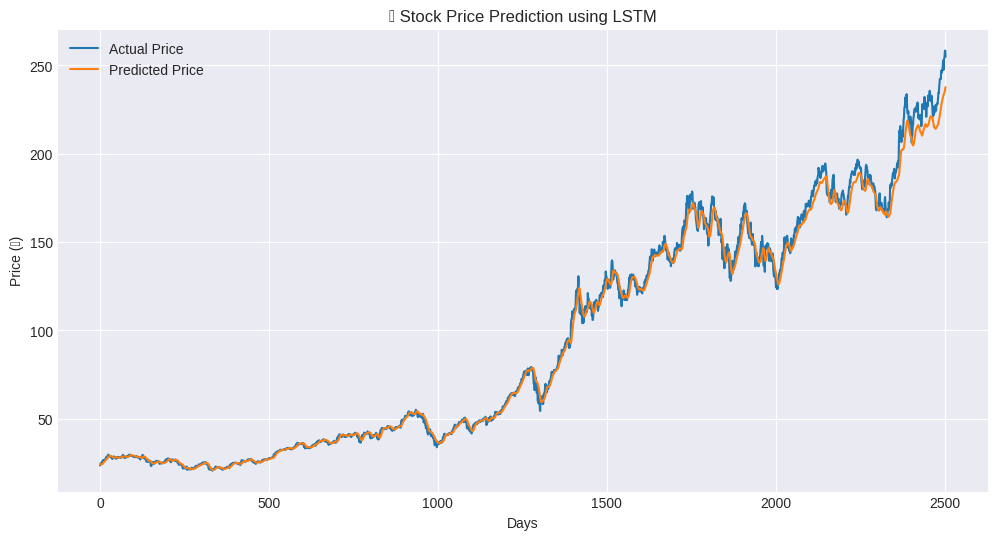

In [ ]:
predicted_scaled =model.predict(X_lstm)
predicted_prices = scaler.inverse_transform(predicted_scaled.reshape(-1,1))
actual_prices = scaler.inverse_transform(y_lstm.reshape(-1,1))
plt.figure(figsize=(12,6))
plt.plot(actual_prices,label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('📈 Stock Price Prediction using LSTM')
plt.xlabel('Days')
plt.ylabel('Price (₹)')
plt.legend()
plt.show()


In [ ]:

df_msft = company_data['MSFT'].copy()
close_prices_msft = df_msft[['Close']]
scaler_msft = MinMaxScaler()
scaled_data_msft = scaler_msft.fit_transform(close_prices_msft)

X_lstm_msft = []
y_lstm_msft = []
sequence_length = 10

for i in range(sequence_length, len(scaled_data_msft)):
    X_lstm_msft.append(scaled_data_msft[i-sequence_length:i, 0])
    y_lstm_msft.append(scaled_data_msft[i, 0])

X_lstm_msft = np.array(X_lstm_msft)
y_lstm_msft = np.array(y_lstm_msft)

X_lstm_msft = np.reshape(X_lstm_msft, (X_lstm_msft.shape[0], X_lstm_msft.shape[1], 1))


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_msft = Sequential()
model_msft.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm_msft.shape[1], 1)))
model_msft.add(LSTM(units=50))
model_msft.add(Dense(units=1))
model_msft.compile(optimizer='adam', loss='mean_squared_error')


history_msft = model_msft.fit(X_lstm_msft, y_lstm_msft, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0282 - val_loss: 6.1609e-04
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1396e-04 - val_loss: 4.9648e-04
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.0181e-04 - val_loss: 4.8812e-04
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.6461e-04 - val_loss: 7.1028e-04
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7209e-04 - val_loss: 9.4938e-04
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.6387e-04 - val_loss: 8.9568e-04
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1.6559e-04 - val_loss: 8.4608e-04
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.6995e-04 - val_loss: 0.0016
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5953e-04 - val_loss: 6.7150e-04
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.6523e-04 - val_loss: 0.0011
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7957e-04 - val_loss: 7.2138e-0

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


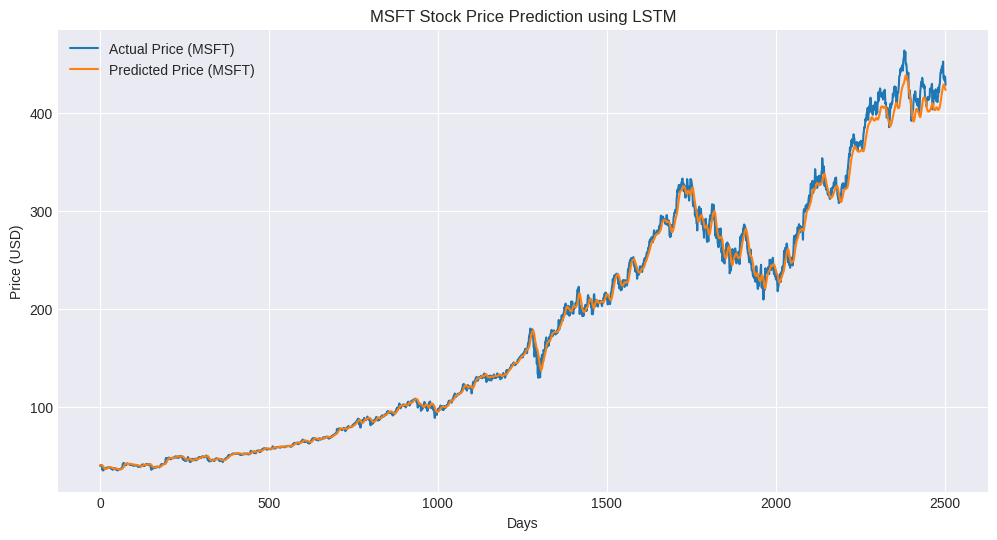

In [ ]:
predicted_scaled_msft = model_msft.predict(X_lstm_msft)
predicted_prices_msft = scaler_msft.inverse_transform(predicted_scaled_msft.reshape(-1, 1))
actual_prices_msft = scaler_msft.inverse_transform(y_lstm_msft.reshape(-1, 1))
plt.figure(figsize=(12,6))
plt.plot(actual_prices_msft, label='Actual Price (MSFT)')
plt.plot(predicted_prices_msft, label='Predicted Price (MSFT)')
plt.title('MSFT Stock Price Prediction using LSTM')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0247 - val_loss: 0.0015
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.2193e-04 - val_loss: 9.3395e-04
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8777e-04 - val_loss: 9.0944e-04
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.5178e-04 - val_loss: 9.7685e-04
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.5601e-04 - val_loss: 0.0013
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.9411e-04 - val_loss: 0.0010
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.4289e-04 - val_loss: 0.0011
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.4767e-04 - val_loss: 8.9853e-04
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.8583e-04 - val_loss: 0.0012
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.6514e-04 - val_loss: 9.7297e-04
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3329e-04 - val_loss: 9.2294e-04

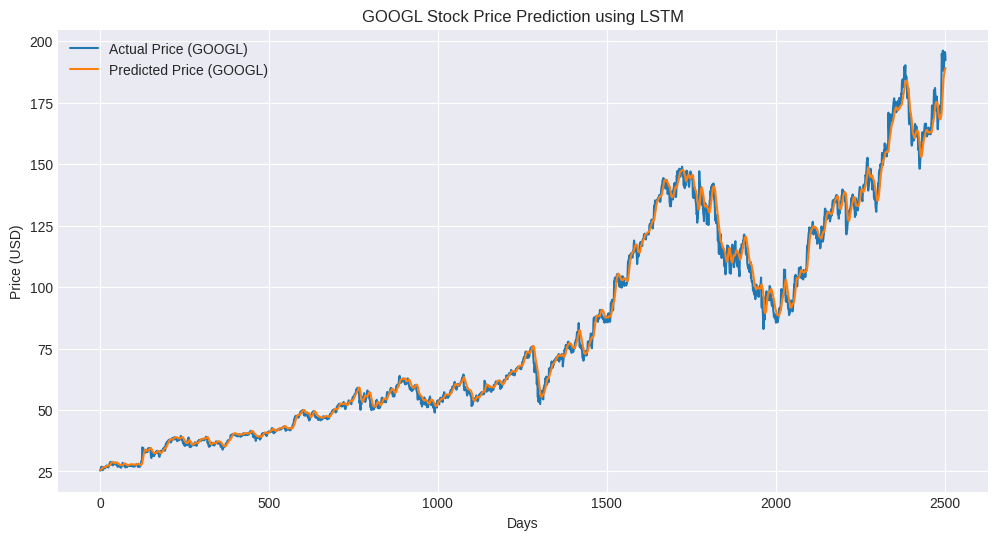

In [ ]:
# --- GOOGL Model Preparation ---
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 1. Prepare data
df_googl = company_data['GOOGL'].copy()
close_prices_googl = df_googl[['Close']]

# 2. Normalize
scaler_googl = MinMaxScaler()
scaled_data_googl = scaler_googl.fit_transform(close_prices_googl)

# 3. Create sequences
X_lstm_googl = []
y_lstm_googl = []
sequence_length = 10

for i in range(sequence_length, len(scaled_data_googl)):
    X_lstm_googl.append(scaled_data_googl[i-sequence_length:i, 0])
    y_lstm_googl.append(scaled_data_googl[i, 0])

X_lstm_googl = np.array(X_lstm_googl)
y_lstm_googl = np.array(y_lstm_googl)
X_lstm_googl = np.reshape(X_lstm_googl, (X_lstm_googl.shape[0], X_lstm_googl.shape[1], 1))

# 4. Build and train model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_googl = Sequential()
model_googl.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm_googl.shape[1], 1)))
model_googl.add(LSTM(units=50))
model_googl.add(Dense(units=1))
model_googl.compile(optimizer='adam', loss='mean_squared_error')
history_googl = model_googl.fit(X_lstm_googl, y_lstm_googl, epochs=20, batch_size=32, validation_split=0.2)

# 5. Plot predictions
predicted_scaled_googl = model_googl.predict(X_lstm_googl)
predicted_prices_googl = scaler_googl.inverse_transform(predicted_scaled_googl.reshape(-1, 1))
actual_prices_googl = scaler_googl.inverse_transform(y_lstm_googl.reshape(-1, 1))

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(actual_prices_googl, label='Actual Price (GOOGL)')
plt.plot(predicted_prices_googl, label='Predicted Price (GOOGL)')
plt.title('GOOGL Stock Price Prediction using LSTM')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0462 - val_loss: 9.3109e-04
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.3123e-04 - val_loss: 6.7515e-04
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.6440e-04 - val_loss: 6.5628e-04
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.2669e-04 - val_loss: 7.7941e-04
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.1661e-04 - val_loss: 7.6824e-04
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.6920e-04 - val_loss: 6.2889e-04
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.0235e-04 - val_loss: 8.5959e-04
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.1419e-04 - val_loss: 6.3138e-04
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.3646e-04 - val_loss: 6.1676e-04
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.1494e-04 - val_loss: 5.8941e-04
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.0172e-04 - val_loss: 6

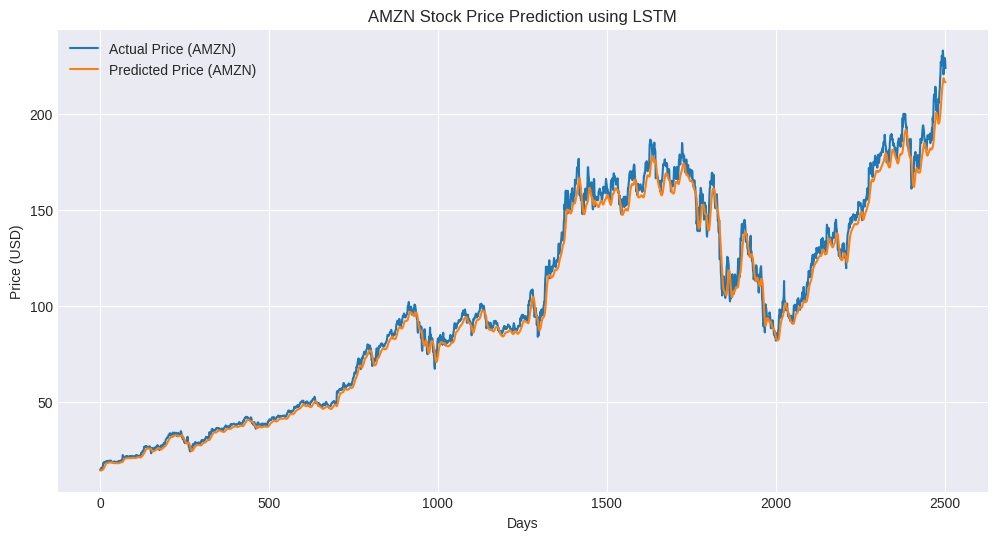

In [ ]:
# --- AMZN Model Preparation ---
df_amzn = company_data['AMZN'].copy()
close_prices_amzn = df_amzn[['Close']]

scaler_amzn = MinMaxScaler()
scaled_data_amzn = scaler_amzn.fit_transform(close_prices_amzn)

X_lstm_amzn = []
y_lstm_amzn = []
sequence_length = 10

for i in range(sequence_length, len(scaled_data_amzn)):
    X_lstm_amzn.append(scaled_data_amzn[i-sequence_length:i, 0])
    y_lstm_amzn.append(scaled_data_amzn[i, 0])

X_lstm_amzn = np.array(X_lstm_amzn)
y_lstm_amzn = np.array(y_lstm_amzn)
X_lstm_amzn = np.reshape(X_lstm_amzn, (X_lstm_amzn.shape[0], X_lstm_amzn.shape[1], 1))

model_amzn = Sequential()
model_amzn.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm_amzn.shape[1], 1)))
model_amzn.add(LSTM(units=50))
model_amzn.add(Dense(units=1))
model_amzn.compile(optimizer='adam', loss='mean_squared_error')
history_amzn = model_amzn.fit(X_lstm_amzn, y_lstm_amzn, epochs=20, batch_size=32, validation_split=0.2)

predicted_scaled_amzn = model_amzn.predict(X_lstm_amzn)
predicted_prices_amzn = scaler_amzn.inverse_transform(predicted_scaled_amzn.reshape(-1, 1))
actual_prices_amzn = scaler_amzn.inverse_transform(y_lstm_amzn.reshape(-1, 1))

plt.figure(figsize=(12,6))
plt.plot(actual_prices_amzn, label='Actual Price (AMZN)')
plt.plot(predicted_prices_amzn, label='Predicted Price (AMZN)')
plt.title('AMZN Stock Price Prediction using LSTM')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
import joblib

# Save models
model.save("aapl_model.h5")
model_msft.save("msft_model.h5")
model_googl.save("googl_model.h5")
model_amzn.save("amzn_model.h5")

# Save scalers
joblib.dump(scaler, "aapl_scaler.save")
joblib.dump(scaler_msft, "msft_scaler.save")
joblib.dump(scaler_googl, "googl_scaler.save")
joblib.dump(scaler_amzn, "amzn_scaler.save")


['amzn_scaler.save']

In [ ]:
import os

files = os.listdir()
print(files)


['.config', 'googl_scaler.save', 'aapl_model.h5', 'amzn_scaler.save', 'aapl_scaler.save', 'msft_scaler.save', 'msft_model.h5', 'amzn_model.h5', 'googl_model.h5', 'sample_data']


In [ ]:
from google.colab import files
files.download('aapl_model.h5')
files.download('aapl_scaler.save')
files.download('msft_model.h5')
files.download('msft_scaler.save')
files.download('googl_model.h5')
files.download('googl_scaler.save')
files.download('amzn_model.h5')
files.download('amzn_scaler.save')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>